In [1]:
%matplotlib inline
from __future__ import division, print_function
import sys
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics

from spherecluster import SphericalKMeans
from spherecluster import VonMisesFisherMixture
from spherecluster import sample_vMF

__Uniformly distributed points on a sphere:__

__vMF does not does always work in this example (e.g. random seed of 5321)__

In [7]:
np.random.seed(521)
x, y, z = np.random.uniform(size=(3, 300))-0.5
length = np.sqrt(x**2+y**2+z**2)
x, y, z = np.array([x, y, z])/length
X = np.column_stack([x, y, z])

# K-Means clustering
print('K-Means')
km = KMeans(n_clusters=2, init='k-means++', n_init=20)
km.fit(X)

# Spherical K-Means clustering
print('Spherical K-Means')
skm = SphericalKMeans(n_clusters=2, init='k-means++', n_init=20)
skm.fit(X)

# Mixture of von Mises Fisher clustering (soft)
print('Mixture of von Mises Fisher clustering (soft)')
vmf_soft = VonMisesFisherMixture(n_clusters=2, posterior_type='soft', n_init=20)
vmf_soft.fit(X)

# Mixture of von Mises Fisher clustering (hard)
print('Mixture of von Mises Fisher clustering (hard)')
vmf_hard = VonMisesFisherMixture(n_clusters=2, posterior_type='hard', n_init=20)
vmf_hard.fit(X)

print()

K-Means
Spherical K-Means
Mixture of von Mises Fisher clustering (soft)
Mixture of von Mises Fisher clustering (hard)



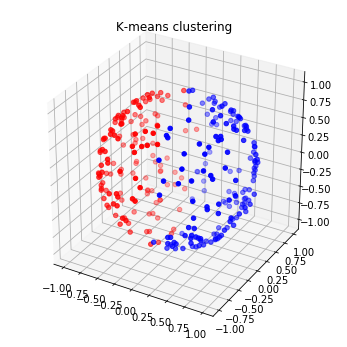

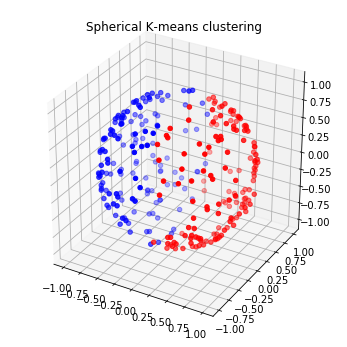

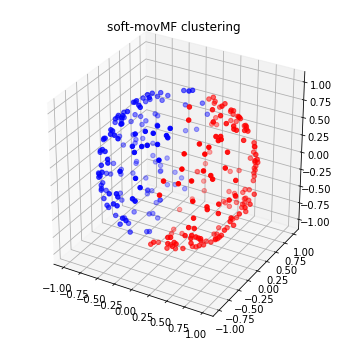

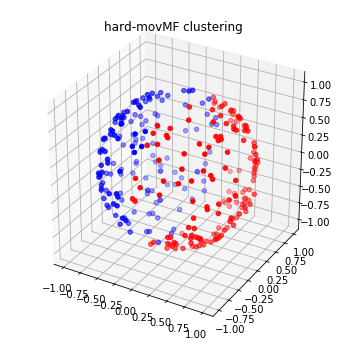

In [5]:
# K-means labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[km.labels_ == 0, 0], X[km.labels_ == 0, 1], X[km.labels_ == 0, 2], c='r')
ax.scatter(X[km.labels_ == 1, 0], X[km.labels_ == 1, 1], X[km.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('K-means clustering')
plt.show()

# Spherical K-means labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[skm.labels_ == 0, 0], X[skm.labels_ == 0, 1], X[skm.labels_ == 0, 2], c='r')
ax.scatter(X[skm.labels_ == 1, 0], X[skm.labels_ == 1, 1], X[skm.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('Spherical K-means clustering')
plt.show()

# von Mises Fisher soft labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[vmf_soft.labels_ == 0, 0], X[vmf_soft.labels_ == 0, 1], X[vmf_soft.labels_ == 0, 2], c='r')
ax.scatter(X[vmf_soft.labels_ == 1, 0], X[vmf_soft.labels_ == 1, 1], X[vmf_soft.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('soft-movMF clustering')
plt.show()

# von Mises Fisher hard labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[vmf_hard.labels_ == 0, 0], X[vmf_hard.labels_ == 0, 1], X[vmf_hard.labels_ == 0, 2], c='r')
ax.scatter(X[vmf_hard.labels_ == 1, 0], X[vmf_hard.labels_ == 1, 1], X[vmf_hard.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('hard-movMF clustering')
plt.show()

__More number of clusters:__

In [10]:
np.random.seed(521)
x, y, z = np.random.uniform(size=(3, 300))-0.5
length = np.sqrt(x**2+y**2+z**2)
x, y, z = np.array([x, y, z])/length
X = np.column_stack([x, y, z])

# K-Means clustering
print('K-Means')
km = KMeans(n_clusters=5, init='k-means++', n_init=20)
km.fit(X)

# Spherical K-Means clustering
print('Spherical K-Means')
skm = SphericalKMeans(n_clusters=5, init='k-means++', n_init=20)
skm.fit(X)

# Mixture of von Mises Fisher clustering (soft)
print('Mixture of von Mises Fisher clustering (soft)')
vmf_soft = VonMisesFisherMixture(n_clusters=5, posterior_type='soft', n_init=20)
vmf_soft.fit(X)

# Mixture of von Mises Fisher clustering (hard)
print('Mixture of von Mises Fisher clustering (hard)')
vmf_hard = VonMisesFisherMixture(n_clusters=5, posterior_type='hard', n_init=20)
vmf_hard.fit(X)

print()

K-Means
Spherical K-Means
Mixture of von Mises Fisher clustering (soft)
Mixture of von Mises Fisher clustering (hard)


/Users/roz18/anaconda/lib/python2.7/site-packages/spherecluster/von_mises_fisher_mixture.py:359: RuntimeWarning: invalid value encountered in double_scalars
  rbar = center_norm / (n_examples * weights[cc])
/Users/roz18/anaconda/lib/python2.7/site-packages/spherecluster/von_mises_fisher_mixture.py:303: RuntimeWarning: divide by zero encountered in log
  weights_log = np.log(weights)


In [17]:
print('K-Means')
output_str = ''
for index in range(5):
    output_str += str(np.sum(km.labels_ == index)) + '  '
print(output_str)
print('Spherical K-Means')
output_str = ''
for index in range(5):
    output_str += str(np.sum(skm.labels_ == index)) + '  '
print(output_str)
print('Mixture of von Mises Fisher clustering (soft)')
output_str = ''
for index in range(5):
    output_str += str(np.sum(vmf_soft.labels_ == index)) + '  '
print(output_str)
print('Mixture of von Mises Fisher clustering (hard)')
output_str = ''
for index in range(5):
    output_str += str(np.sum(vmf_hard.labels_ == index)) + '  '
print(output_str)

K-Means
45  58  69  70  58  
Spherical K-Means
59  64  61  66  50  
Mixture of von Mises Fisher clustering (soft)
29  125  19  105  22  
Mixture of von Mises Fisher clustering (hard)
45  75  40  37  103  


__Spherical K-means gives the most uniform sample sizes__

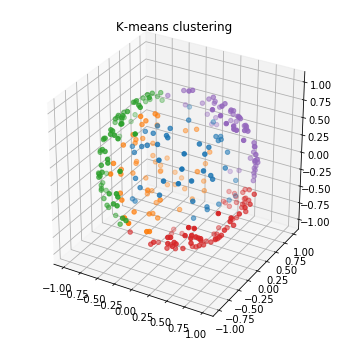

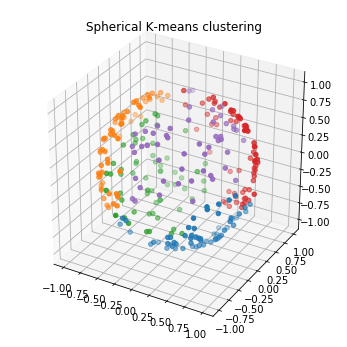

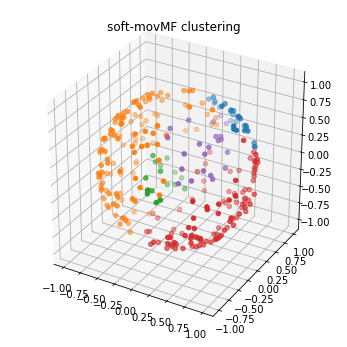

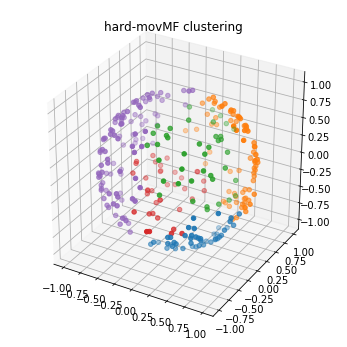

In [14]:
# K-means labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
for index in range(5):
    ax.scatter(X[km.labels_ == index, 0], X[km.labels_ == index, 1], X[km.labels_ == index, 2], c='C'+str(index))
ax.set_aspect('equal')
plt.title('K-means clustering')
plt.show()

# Spherical K-means labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
for index in range(5):
    ax.scatter(X[skm.labels_ == index, 0], X[skm.labels_ == index, 1], X[skm.labels_ == index, 2], c='C'+str(index))
ax.set_aspect('equal')
plt.title('Spherical K-means clustering')
plt.show()

# von Mises Fisher soft labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
for index in range(5):
    ax.scatter(X[vmf_soft.labels_ == index, 0], X[vmf_soft.labels_ == index, 1], X[vmf_soft.labels_ == index, 2], c='C'+str(index))
ax.set_aspect('equal')
plt.title('soft-movMF clustering')
plt.show()

# von Mises Fisher hard labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
for index in range(5):
    ax.scatter(X[vmf_hard.labels_ == index, 0], X[vmf_hard.labels_ == index, 1], X[vmf_hard.labels_ == index, 2], c='C'+str(index))
ax.set_aspect('equal')
plt.title('hard-movMF clustering')
plt.show()

-----------

__Example from the spherecluster packages:__

In [8]:
# Generate small-mix dataset
mu_0 = np.array([-0.251, -0.968, -0.105])
mu_0 = mu_0 / np.linalg.norm(mu_0)
mu_1 = np.array([0.399, 0.917, 0.713])
mu_1 = mu_1 / np.linalg.norm(mu_1)
mus = [mu_0, mu_1]
kappa_0 = 8  # concentration parameter
kappa_1 = 2  # concentration parameter
kappas = [kappa_0, kappa_1]
num_points_per_class = 300

X_0 = sample_vMF(mu_0, kappa_0, num_points_per_class)
X_1 = sample_vMF(mu_1, kappa_1, num_points_per_class)
X = np.zeros((2 * num_points_per_class, 3))
X[:num_points_per_class, :] = X_0
X[num_points_per_class:, :] = X_1
labels = np.zeros((2 * num_points_per_class, ))
labels[num_points_per_class:] = 1

# K-Means clustering
print('K-Means')
km = KMeans(n_clusters=2, init='k-means++', n_init=20)
km.fit(X)

# Spherical K-Means clustering
print('Spherical K-Means')
skm = SphericalKMeans(n_clusters=2, init='k-means++', n_init=20)
skm.fit(X)

# Mixture of von Mises Fisher clustering (soft)
print('Mixture of von Mises Fisher clustering (soft)')
vmf_soft = VonMisesFisherMixture(n_clusters=2, posterior_type='soft', n_init=20)
vmf_soft.fit(X)

# Mixture of von Mises Fisher clustering (hard)
print('Mixture of von Mises Fisher clustering (hard)')
vmf_hard = VonMisesFisherMixture(n_clusters=2, posterior_type='hard', n_init=20)
vmf_hard.fit(X)

print()

K-Means
Spherical K-Means
Mixture of von Mises Fisher clustering (soft)
Mixture of von Mises Fisher clustering (hard)



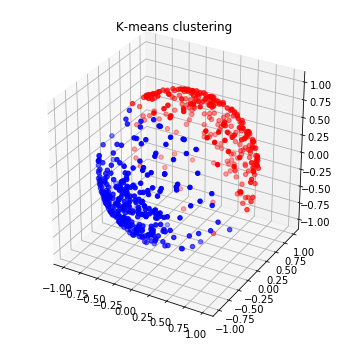

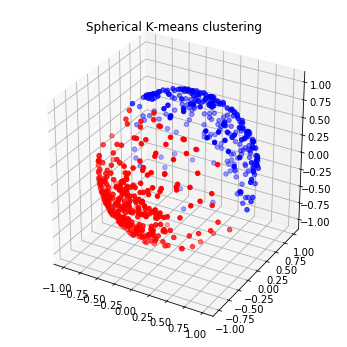

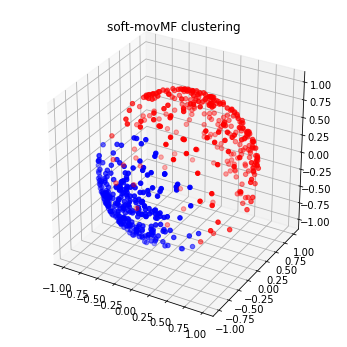

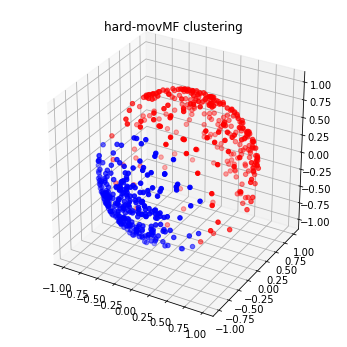

In [9]:
# K-means labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[km.labels_ == 0, 0], X[km.labels_ == 0, 1], X[km.labels_ == 0, 2], c='r')
ax.scatter(X[km.labels_ == 1, 0], X[km.labels_ == 1, 1], X[km.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('K-means clustering')
plt.show()

# Spherical K-means labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[skm.labels_ == 0, 0], X[skm.labels_ == 0, 1], X[skm.labels_ == 0, 2], c='r')
ax.scatter(X[skm.labels_ == 1, 0], X[skm.labels_ == 1, 1], X[skm.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('Spherical K-means clustering')
plt.show()

# von Mises Fisher soft labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[vmf_soft.labels_ == 0, 0], X[vmf_soft.labels_ == 0, 1], X[vmf_soft.labels_ == 0, 2], c='r')
ax.scatter(X[vmf_soft.labels_ == 1, 0], X[vmf_soft.labels_ == 1, 1], X[vmf_soft.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('soft-movMF clustering')
plt.show()

# von Mises Fisher hard labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal', projection='3d',
        adjustable='box-forced', xlim=[-1.1, 1.1], ylim=[-1.1, 1.1],
        zlim=[-1.1, 1.1])
ax.scatter(X[vmf_hard.labels_ == 0, 0], X[vmf_hard.labels_ == 0, 1], X[vmf_hard.labels_ == 0, 2], c='r')
ax.scatter(X[vmf_hard.labels_ == 1, 0], X[vmf_hard.labels_ == 1, 1], X[vmf_hard.labels_ == 1, 2], c='b')
ax.set_aspect('equal')
plt.title('hard-movMF clustering')
plt.show()